In [1]:
%matplotlib widget
import watchdog.events
import watchdog.observers
import time
import pylab as plt
import numpy as np
import config


In [2]:
class Handler(watchdog.events.PatternMatchingEventHandler):
    def __init__(self):
        # Set the patterns for PatternMatchingEventHandler
        watchdog.events.PatternMatchingEventHandler.__init__(self, patterns=['*run*.txt'], ignore_directories=True, case_sensitive=False)

    def on_created(self, event):
        print("Watchdog received created event - % s." % event.src_path)
        # Event is created, you can process it now
        config.file_name = event.src_path
        config.update = True

    def on_modified(self, event):
        print("Watchdog received modified event - % s." % event.src_path)
        # Event is modified, you can process it now
        config.file_name = event.src_path
        config.update = True

def read_file(file_name):
    data = np.loadtxt(file_name)
    return data.T



def setup_plot():
    plt.close(1)
    fig = plt.figure(1)
    line = plt.plot(0,0, 'o-', color="royalblue")[0]

def update_plot(data):
    global line
    x = data[0]
    y = data[-16]
    line.set_data(x,y)
    plt.xlim(np.min(x), np.max(x))
    plt.ylim(np.min(y), np.max(y))
    plt.pause(0.001)


In [3]:
config.file_name

''

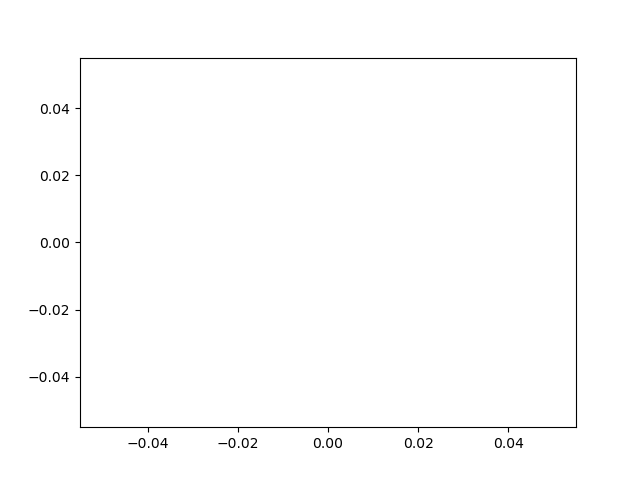

In [4]:
plt.ion()
plt.close(1)
fig = plt.figure(1)
line = plt.plot(0,0)[0]
src_path = "/photonics/home/gac-slab/test/"
event_handler = Handler()



In [5]:
observer = watchdog.observers.Observer()
observer.schedule(event_handler, path=src_path, recursive=True)
observer.start()
if config.update:
    observer.stop()
observer.join()


KeyboardInterrupt: 

In [ ]:
try:
    while True:
        time.sleep(.01)
        if config.update:
            data = read_file(config.file_name)
            update_plot(data)
            config.update = False
except KeyboardInterrupt:
    observer.stop()


In [7]:
observer = watchdog.observers.Observer()
observer.schedule(handler, path=src_path, recursive=True)
observer.start()
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    observer.stop()
observer.join()

KeyboardInterrupt: 